# Module 4
## Trade Call Prediction using Classification

In this module, we'd be covering the concept of classification and utilize our skills to solve the following queries – (Stock Price = Close Price)

# Query 4.1 

Import the csv file of the stock which contained the Bollinger columns as well.

Create a new column 'Call' , whose entries are -'Buy' if the stock price is below the lower Bollinger band'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band'Short' if the stock price is above the upper Bollinger band

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("MINDTREE.csv", parse_dates=True)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MINDTREE,EQ,15-May-17,510.60,507.35,515.00,505.90,510.50,509.45,510.39,271952,138800509.8,8261,100362,36.90
1,MINDTREE,EQ,16-May-17,509.45,507.00,515.85,506.00,511.00,511.30,512.69,207011,106131728.2,5550,82090,39.65
2,MINDTREE,EQ,17-May-17,511.30,507.05,519.70,502.75,504.00,506.35,512.10,391401,200437504.6,13341,150098,38.35
3,MINDTREE,EQ,18-May-17,506.35,502.00,516.75,486.00,487.50,492.90,505.60,852336,430937717.1,18513,170919,20.05
4,MINDTREE,EQ,19-May-17,492.90,491.95,502.95,489.50,495.15,497.50,496.43,352273,174878151.5,8326,57853,16.42


Bollinger Bands  is used to define the prevailing high and low prices in a market to characterize the trading band of a financial instrument or commodity. Bollinger Bands are a volatility indicator. Bands are consists of Moving Average (MA) line, a upper band and lower band. The upper and lower bands are simply MA adding and subtracting standard deviation. Standard deviation is a measurement of volatility. That’s why it’s a volatility indictor.

Create a new column 'Call', whose entries are -
- 'Buy' if the stock price is below the lower Bollinger band
- 'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band
- 'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band
- 'Short' if the stock price is above the upper Bollinger band

In [3]:
# calculating Simple Moving Average with 20 days window
df['sma'] = df['Close Price'].rolling(window=20).mean()

# calculating the standar deviation
df['rstd'] = df['Close Price'].rolling(window=20).std()

In [4]:
df['upper_band'] = df['sma'] + 2 * df['rstd']
df['lower_band'] = df['sma'] - 2 * df['rstd']
df['mid_band'] = (df['upper_band'] + df['lower_band']) / 2
df.dropna(inplace=True)
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,rstd,upper_band,lower_band,mid_band
19,MINDTREE,EQ,09-Jun-17,543.50,542.0,542.75,534.15,537.05,538.75,538.62,229279,123494625.6,7087,87478,38.15,526.1275,19.767594,565.662687,486.592313,526.1275
20,MINDTREE,EQ,12-Jun-17,538.75,536.1,544.55,528.05,539.00,539.80,538.19,379066,204010845.4,9623,98241,25.92,527.6450,19.584015,566.813031,488.476969,527.6450


In [5]:
def call(df):
    if df['Close Price'] < df['lower_band']:
        return "Buy"
    elif (df['Close Price'] > df['lower_band']) and (df['Close Price'] < df['mid_band']):
        return "Hold Buy/Liquidate Short"
    elif (df['Close Price'] > df['mid_band']) and (df['Close Price'] < df['upper_band']):
        return "Hold Short/Liquidate Buy"
    else:
        return "Short"

In [6]:
df['Call'] = df.apply(call, axis = 1)
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,rstd,upper_band,lower_band,mid_band,Call
19,MINDTREE,EQ,09-Jun-17,543.50,542.0,542.75,534.15,537.05,538.75,538.62,...,123494625.6,7087,87478,38.15,526.1275,19.767594,565.662687,486.592313,526.1275,Hold Short/Liquidate Buy
20,MINDTREE,EQ,12-Jun-17,538.75,536.1,544.55,528.05,539.00,539.80,538.19,...,204010845.4,9623,98241,25.92,527.6450,19.584015,566.813031,488.476969,527.6450,Hold Short/Liquidate Buy


Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [7]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
scr = StandardScaler()
lbc = LabelEncoder()

In [8]:
x = df[['Close Price', 'lower_band', 'mid_band', 'upper_band']]
x = scr.fit_transform(x)
y = df['Call']
y = lbc.fit_transform(y).reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [11]:
max_features = y.max()

In [12]:
from collections import OrderedDict

In [13]:
classifier_models = OrderedDict([
    ("Nearest Neighbors", KNeighborsClassifier(max_features)),
    ("Linear SVM",        SVC(kernel="linear", C=0.025)),
    ("RBF SVM",           SVC(gamma=2, C=1)),
    ("Decision Tree",     DecisionTreeClassifier(max_depth=5)),
    ("Random Forest",     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=max_features)),
    ("AdaBoost",          AdaBoostClassifier()),
    ("Naive Bayes",       GaussianNB())
])

classifier_models

OrderedDict([('Nearest Neighbors',
              KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=1, n_neighbors=3, p=2,
                         weights='uniform')),
             ('Linear SVM',
              SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
                max_iter=-1, probability=False, random_state=None, shrinking=True,
                tol=0.001, verbose=False)),
             ('RBF SVM', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
                max_iter=-1, probability=False, random_state=None, shrinking=True,
                tol=0.001, verbose=False)),
             ('Decision Tree',
              DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                          max_featur

In [14]:
accuracy_scores = {}
for model_name, classifier in classifier_models.items():
    classifier.fit(X_train, Y_train.ravel())
    y_pred = classifier.predict(X_test)
    accuracy_scores[model_name] = classifier.score(X_test, Y_test)
    
accuracy_scores = OrderedDict(sorted(accuracy_scores.items(), key=lambda x: x[1]))
accuracy_scores

OrderedDict([('Linear SVM', 0.5384615384615384),
             ('Naive Bayes', 0.5524475524475524),
             ('AdaBoost', 0.5944055944055944),
             ('Decision Tree', 0.7342657342657343),
             ('Random Forest', 0.7902097902097902),
             ('RBF SVM', 0.8041958041958042),
             ('Nearest Neighbors', 0.8461538461538461)])

In [15]:
hero_df = pd.read_csv('HEROMOTOCO.csv', parse_dates=['Date'])
hero_df.set_index('Date', inplace=True)

hero_df["sma"] = hero_df["Close Price"].rolling(20).mean()
hero_df["std"] = hero_df["Close Price"].rolling(20).std()
hero_df["upper_band"] = hero_df["sma"] + hero_df["std"] * 2
hero_df["lower_band"] = hero_df["sma"] - hero_df["std"] * 2

In [16]:
hero_df   = hero_df.dropna()
hero_X = scr.fit_transform(hero_df[['Close Price', 'std', 'upper_band', 'lower_band']])
hero_df['Call'] = classifier_models["Nearest Neighbors"].predict(hero_X)
hero_df.to_csv('hero_trained.csv')

In [17]:
print("hero_df['Call'].unique() =", hero_df['Call'].unique())
hero_df.head(2)

hero_df['Call'].unique() = [2 3 1 0]


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,sma,std,upper_band,lower_band,Call
Date,,,,,,,,,,,,,,,,,,,
2017-06-09,HEROMOTOCO,EQ,3784.45,3796.3,3800.5,3755.60,3786.00,3780.10,3779.46,302560,1.143514e+09,19861,198672,65.66,3684.06,107.366537,3898.793074,3469.326926,2
2017-06-12,HEROMOTOCO,EQ,3780.10,3777.0,3790.0,3760.35,3771.05,3773.25,3779.97,182605,6.902422e+08,17760,117935,64.58,3696.95,101.366032,3899.682063,3494.217937,2


In [18]:
hero_df.reset_index(inplace=True)

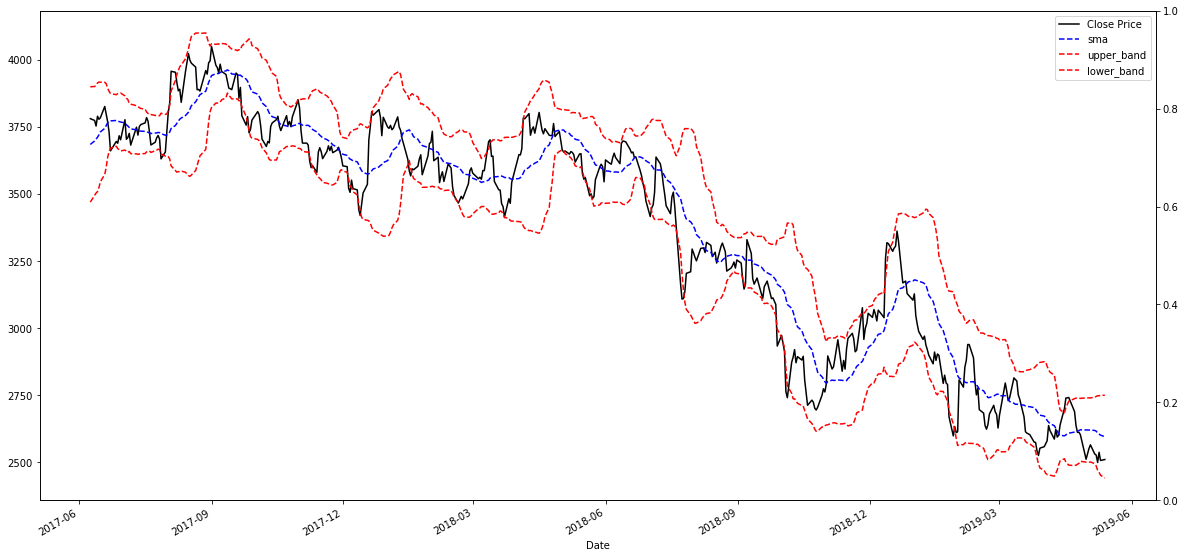

In [19]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.gca()
ax2 = ax1.twinx()


hero_df.plot(kind='line',x='Date', y='Close Price', ax=ax1, color='black')
hero_df.plot(kind='line',x='Date', y='sma', ax=ax1, color='blue', linestyle='--')
hero_df.plot(kind='line',x='Date', y='upper_band', ax=ax1, color='red',  linestyle='--')
hero_df.plot(kind='line',x='Date', y='lower_band', ax=ax1, color='red',  linestyle='--')

# Query 4.2 

Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

Import the stock data file of your choice

Define 4 new columns , whose values are:
% change between Open and Close price for the day
% change between Low and High price for the day
5 day rolling mean of the day to day % change in Close Price
5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are:
1 if next day's price(Close) is greater than present day's.
(-1) if next day's price(Close) is less than present day's.
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [20]:
maruthi_df = pd.read_csv('MARUTI.csv').set_index('Date')
maruthi_df.head(2)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
15-May-2017,MARUTI,EQ,6730.2,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
16-May-2017,MARUTI,EQ,6823.9,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97


Define 4 new columns , whose values are:
* % change between Open and Close price for the day
* % change between Low and High price for the day
* 5 day rolling mean of the day to day % change in Close Price
* 5 day rolling std of the day to day % change in Close Price

In [21]:
maruthi_df['price_Open_Close'] = (maruthi_df['Close Price'] - maruthi_df['Open Price']) / maruthi_df['Open Price']
maruthi_df['price_High_Low'] = (maruthi_df['High Price']  - maruthi_df['Low Price']) / maruthi_df['Low Price']

maruthi_df['Day_Perc_Change'] = maruthi_df['Close Price'].pct_change().fillna(0)

maruthi_df['5day_mean'] = maruthi_df['Day_Perc_Change'].rolling(5).mean()
maruthi_df['5day_std'] = maruthi_df['Day_Perc_Change'].rolling(5).std()

maruthi_df.dropna(inplace=True)

maruthi_df.head(2)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,price_Open_Close,price_High_Low,Day_Perc_Change,5day_mean,5day_std
Date,,,,,,,,,,,,,,,,,,,
19-May-2017,MARUTI,EQ,6831.05,6854.80,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,-0.009373,0.030240,-0.005929,-0.000907,0.013496
22-May-2017,MARUTI,EQ,6790.55,6803.95,6843.95,6689.25,6694.3,6701.70,6732.22,327493,2.204756e+09,36146,158645,48.44,-0.015028,0.023127,-0.013084,-0.003523,0.014507


Create a new column 'Action' whose values are:

* 1 if next day's price(Close) is greater than present day's.
* (-1) if next day's price(Close) is less than present day's.
* i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
* i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [22]:
maruthi_df['Action'] = np.where(maruthi_df['Close Price'].shift(-1) > maruthi_df['Close Price'], 1, -1 )
maruthi_df.head(2)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,price_Open_Close,price_High_Low,Day_Perc_Change,5day_mean,5day_std,Action
Date,,,,,,,,,,,,,,,,,,,,
19-May-2017,MARUTI,EQ,6831.05,6854.80,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,-0.009373,0.030240,-0.005929,-0.000907,0.013496,-1
22-May-2017,MARUTI,EQ,6790.55,6803.95,6843.95,6689.25,6694.3,6701.70,6732.22,327493,2.204756e+09,36146,158645,48.44,-0.015028,0.023127,-0.013084,-0.003523,0.014507,1


In [23]:
maruthi_df.to_csv('maruthi_trained.csv')

Construct a classification model with the 4 new inputs and 'Action' as target

In [24]:
maruthi_df.dropna(inplace=True)
X = maruthi_df[['price_Open_Close', 'price_High_Low', '5day_mean', '5day_std']]
Y = maruthi_df['Action']

X = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, max_features=2)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
rfc.fit(X_train,  Y_train)
rfc.score(X_test, Y_test)

0.5153374233128835

Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

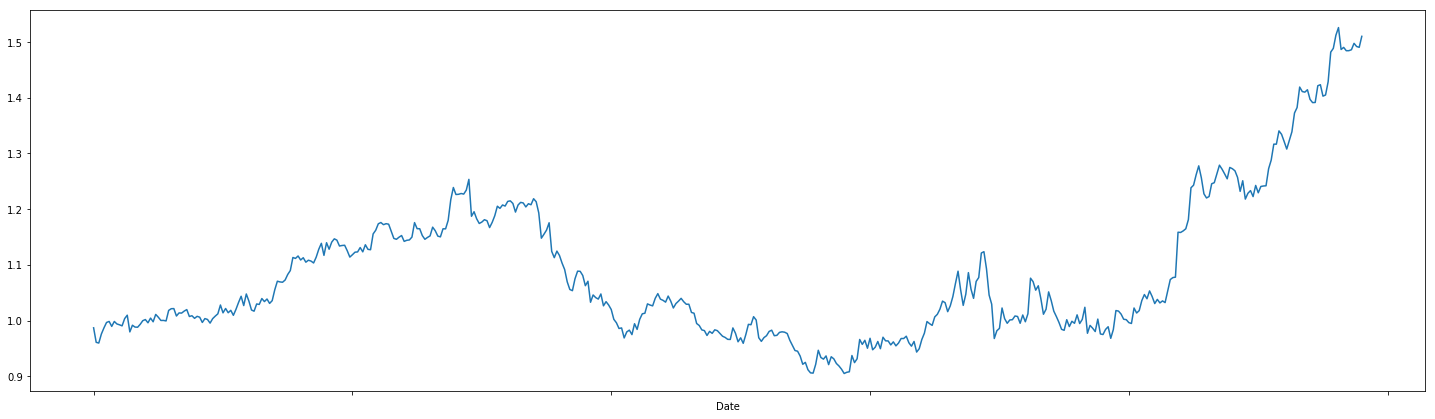

In [26]:
# Cumulative Product of PCT change in Close_Price with predicted actions
plt.figure(figsize=(25, 7))

cumulative_returns = ( 1 + (maruthi_df['Close Price'].pct_change() * maruthi_df['Action']) ).dropna().cumprod()
cumulative_returns.plot()